In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("D:\GitHub\QishiQR")
import Utils.MajorContract_Offsets
import importlib
importlib.reload(Utils.MajorContract_Offsets)
from Utils.MajorContract_Offsets import *

import Backtesting.Vectorized.lm_validation
importlib.reload(Backtesting.Vectorized.lm_validation)
from Backtesting.Vectorized.lm_validation import LmValidation

importlib.reload(Backtesting.Vectorized.Strategy)
from Backtesting.Vectorized.Strategy import *

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
freq=5
px_th = 0
offset = [0.1+i for i in range(5)]

ag_train, ag_test, ag_probability_table = MajorContracts(symbol='ag', split_time = '2016-7-1', topdir=r'..\\Data',
                                          maturity={'1606':['2015-11-1','2016-5-1'],  
                                                    '1612':['2016-3-1','2016-11-1'],
                                                    '1706':['2016-6-1','2017-1-31']}, 
                                       transitions={'1606':'2016-4-1', 
                                                    '1612':'2016-10-15', 
                                                    '1706':'2017-1-1' },
                                        price='MidPrice',
                                        freq = freq, offset = offset, threshold=px_th).create_major_overlap()

ag1606 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-04-01 00:00:00
probability table:  20160104 20160331
probability table:  20160104 20160331
probability table:  20160104 20160331
probability table:  20160104 20160331
probability table:  20160104 20160331
ag1612 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-3-1', '2016-11-1'] 2016-04-01 00:00:00 2016-10-15 00:00:00
probability table:  20160401.0 20160630.0
probability table:  20160401.0 20160630.0
probability table:  20160401 20160630
probability table:  20160401 20160630
probability table:  20160401 20160630
ag1706 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1706 ['2016-6-1', '2017-1-31'] 2016-10-15 00:00:00 2016-12-31 00:00:00


In [4]:
for offset in ag_test.keys():
    ag_test[offset].to_csv(r'../Output/ag_major_' + str(freq) + '_th' + str(px_th) + '_' + offset + '.csv')
for contract in ['1606', '1612']:
    ag_probability_table[contract].to_csv(r'../Strategy/ag_'+ contract + '_major_strategy_' + str(freq) + '_th' + str(px_th) + '.csv', index=False)

In [5]:
#ag
px_th=0
filepath = "../Strategy"
#fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "ag_*_major_strategy_"+str(freq)+"_th"+str(px_th)+".csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/ag_major_strategy_'+str(freq)+'_th'+str(px_th)+'.csv')
print(slm.head())

ag_1606_major_strategy_5_th0.csv
ag_1612_major_strategy_5_th0.csv
   prior      0      1      2  total signal
0      p  13385  25550  25970  64905      2
1     p0   3972   4733   4679  13384      1
2    p00   1470   1242   1260   3972      0
3   p000    640    408    422   1470      0
4  p0000    336    145    159    640      0


ag_major_5_th0_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ag_major_5_th0_1.1.csv
ag_major_5_th0_2.1.csv
ag_major_5_th0_3.1.csv
ag_major_5_th0_4.1.csv


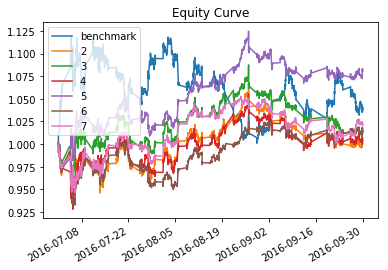

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.192335              0.000064                -0.001535   
1               0.185625              0.000217                -0.001719   
2               0.200019              0.000106                -0.001820   
3               0.209171              0.001077                -0.001525   
4               0.209400              0.000240                -0.001525   
5               0.211990              0.000324                -0.001403   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.000858                  0.000001             -0.030455   
1                 0.000888                  0.000006             -0.029823   
2                 0.000925                  0.000003             -0.040529   
3                 0.000908                  0.000026             -0.028046   
4                 0.000945                  0.000006             -0.032567   
5     

In [6]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-7-1',end='2016-9-30', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5, price='MidPrice', px_th=px_th)
lm_validation.run()

ag_major_5_th0_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ag_major_5_th0_1.1.csv
ag_major_5_th0_2.1.csv
ag_major_5_th0_3.1.csv
ag_major_5_th0_4.1.csv


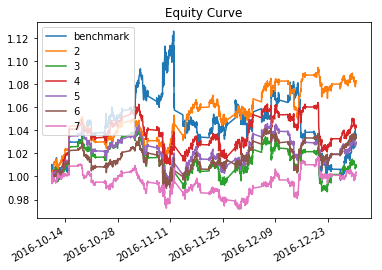

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.170441              0.001141                -0.001262   
1               0.161659              0.000156                -0.001427   
2               0.167791              0.000619                -0.001436   
3               0.169278              0.000431                -0.001266   
4               0.164536              0.000506                -0.001247   
5               0.170795              0.000066                -0.001132   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.000750                  0.000027             -0.022417   
1                 0.000768                  0.000004             -0.025730   
2                 0.000787                  0.000018             -0.025730   
3                 0.000765                  0.000011             -0.023942   
4                 0.000797                  0.000013             -0.025839   
5     

In [7]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-10-1',end='2016-12-31', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5, price='MidPrice', px_th=px_th)
lm_validation.run()

# price threshold = 1

In [8]:
freq=5
px_th = 1
offset = [0.1+i for i in range(5)]

ag_train, ag_test, ag_probability_table = MajorContracts(symbol='ag', split_time = '2016-7-1', topdir=r'..\\Data',
                                          maturity={'1606':['2015-11-1','2016-5-1'],  
                                                    '1612':['2016-3-1','2016-11-1'],
                                                    '1706':['2016-6-1','2017-1-31']}, 
                                       transitions={'1606':'2016-4-1', 
                                                    '1612':'2016-10-15', 
                                                    '1706':'2017-1-1' },
                                        price='MidPrice',
                                        freq = freq, offset = offset, threshold=px_th).create_major_overlap()

ag1606 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-04-01 00:00:00
probability table:  20160104 20160331
probability table:  20160104 20160331
probability table:  20160104 20160331
probability table:  20160104 20160331
probability table:  20160104 20160331
ag1612 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-3-1', '2016-11-1'] 2016-04-01 00:00:00 2016-10-15 00:00:00
probability table:  20160401.0 20160630.0
probability table:  20160401.0 20160630.0
probability table:  20160401 20160630
probability table:  20160401 20160630
probability table:  20160401 20160630
ag1706 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1706 ['2016-6-1', '2017-1-31'] 2016-10-15 00:00:00 2016-12-31 00:00:00


In [9]:
for offset in ag_test.keys():
    ag_test[offset].to_csv(r'../Output/ag_major_' + str(freq) + '_th' + str(px_th) + '_' + offset + '.csv')
for contract in ['1606', '1612']:
    ag_probability_table[contract].to_csv(r'../Strategy/ag_'+ contract + '_major_strategy_' + str(freq) + '_th' + str(px_th) + '.csv', index=False)

In [10]:
#bu
filepath = "../Strategy"
#fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "ag_*_major_strategy_"+str(freq)+"_th"+str(px_th)+".csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/ag_major_strategy_'+str(freq)+'_th'+str(px_th)+'.csv')
print(slm.head())

ag_1606_major_strategy_5_th1.csv
ag_1612_major_strategy_5_th1.csv
   prior      0      1      2  total signal
0      p  35023  14793  15089  64905      0
1     p0  22362   6354   6303  35019      0
2    p00  15624   3304   3433  22361      0
3   p000  11425   2063   2135  15623      0
4  p0000   8641   1369   1415  11425      0


ag_major_5_th1_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ag_major_5_th1_1.1.csv
ag_major_5_th1_2.1.csv
ag_major_5_th1_3.1.csv
ag_major_5_th1_4.1.csv


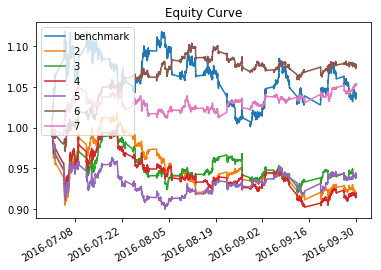

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.235695             -0.001083                -0.004587   
1               0.223040             -0.000747                -0.004578   
2               0.229389             -0.001104                -0.005267   
3               0.228009             -0.000774                -0.004009   
4               0.226273              0.001025                -0.002948   
5               0.224391              0.000711                -0.002452   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002698                 -0.000168             -0.055591   
1                 0.002877                 -0.000125             -0.055637   
2                 0.003312                 -0.000221             -0.053092   
3                 0.002612                 -0.000105             -0.053974   
4                 0.002324                  0.000093             -0.030358   
5     

In [11]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-7-1',end='2016-9-30', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5, price='MidPrice', px_th=px_th)
lm_validation.run()

ag_major_5_th1_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ag_major_5_th1_1.1.csv
ag_major_5_th1_2.1.csv
ag_major_5_th1_3.1.csv
ag_major_5_th1_4.1.csv


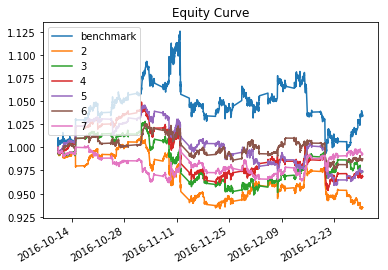

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.168461             -0.000922                -0.003875   
1               0.167275             -0.000361                -0.003763   
2               0.170338             -0.000429                -0.004469   
3               0.181910             -0.000350                -0.003396   
4               0.163154             -0.000163                -0.002655   
5               0.173354             -0.000092                -0.002191   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002187                 -0.000161             -0.029674   
1                 0.002348                 -0.000061             -0.031620   
2                 0.002659                 -0.000096             -0.035868   
3                 0.002277                 -0.000055             -0.027121   
4                 0.001974                 -0.000015             -0.027509   
5     

In [12]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-10-1',end='2016-12-31', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5, price='MidPrice', px_th=px_th)
lm_validation.run()

# price threshold = 2

In [13]:
freq=5
px_th = 2
offset = [0.1+i for i in range(5)]

ag_train, ag_test, ag_probability_table = MajorContracts(symbol='ag', split_time = '2016-7-1', topdir=r'..\\Data',
                                          maturity={'1606':['2015-11-1','2016-5-1'],  
                                                    '1612':['2016-3-1','2016-11-1'],
                                                    '1706':['2016-6-1','2017-1-31']}, 
                                       transitions={'1606':'2016-4-1', 
                                                    '1612':'2016-10-15', 
                                                    '1706':'2017-1-1' },
                                        price='MidPrice',
                                        freq = freq, offset = offset, threshold=px_th).create_major_overlap()

ag1606 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-04-01 00:00:00
probability table:  20160104 20160331
probability table:  20160104 20160331
probability table:  20160104 20160331
probability table:  20160104 20160331
probability table:  20160104 20160331
ag1612 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-3-1', '2016-11-1'] 2016-04-01 00:00:00 2016-10-15 00:00:00
probability table:  20160401.0 20160630.0
probability table:  20160401.0 20160630.0
probability table:  20160401 20160630
probability table:  20160401 20160630
probability table:  20160401 20160630
ag1706 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1706 ['2016-6-1', '2017-1-31'] 2016-10-15 00:00:00 2016-12-31 00:00:00


In [14]:
for offset in ag_test.keys():
    ag_test[offset].to_csv(r'../Output/ag_major_' + str(freq) + '_th' + str(px_th) + '_' + offset + '.csv')
for contract in ['1606', '1612']:
    ag_probability_table[contract].to_csv(r'../Strategy/ag_'+ contract + '_major_strategy_' + str(freq) + '_th' + str(px_th) + '.csv', index=False)

In [15]:
#ag
filepath = "../Strategy"
#fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "ag_*_major_strategy_"+str(freq)+"_th"+str(px_th)+".csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/ag_major_strategy_'+str(freq)+'_th'+str(px_th)+'.csv')
print(slm.head())

ag_1606_major_strategy_5_th2.csv
ag_1612_major_strategy_5_th2.csv
   prior      0     1     2  total signal
0      p  46747  8954  9204  64905      0
1     p0  36798  4987  4954  46739      0
2    p00  30313  3196  3282  36791      0
3   p000  25665  2268  2374  30307      0
4  p0000  22180  1707  1775  25662      0


ag_major_5_th2_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ag_major_5_th2_1.1.csv
ag_major_5_th2_2.1.csv
ag_major_5_th2_3.1.csv
ag_major_5_th2_4.1.csv


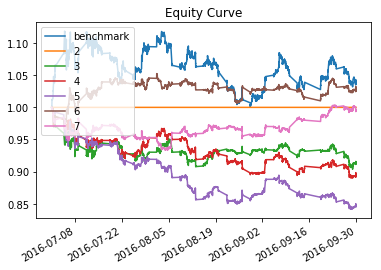

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.213003             -0.001169                -0.014263   
2               0.215537             -0.001424                -0.012185   
3               0.207041             -0.002154                -0.009257   
4               0.210250              0.000417                -0.005445   
5               0.245162             -0.000051                -0.004470   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.009646                 -0.001312             -0.052007   
2                 0.007951                 -0.001334             -0.046380   
3                 0.006479                 -0.001285             -0.043375   
4                 0.005130                  0.000114             -0.043186   
5     

In [16]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-7-1',end='2016-9-30', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5, price='MidPrice', px_th=px_th)
lm_validation.run()

ag_major_5_th2_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ag_major_5_th2_1.1.csv
ag_major_5_th2_2.1.csv
ag_major_5_th2_3.1.csv
ag_major_5_th2_4.1.csv


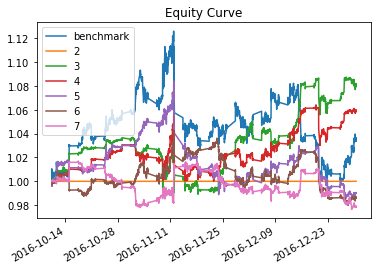

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.177571              0.001124                -0.010502   
2               0.178002              0.000817                -0.010220   
3               0.172578             -0.000123                -0.008348   
4               0.172335             -0.000178                -0.005457   
5               0.166171             -0.000282                -0.004092   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.009767                  0.001542             -0.034800   
2                 0.007360                  0.000706             -0.047411   
3                 0.006229                 -0.000075             -0.040367   
4                 0.004791                 -0.000086             -0.032261   
5     

In [17]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-10-1',end='2016-12-31', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5, price='MidPrice', px_th=px_th)
lm_validation.run()

# 2 min freq and price threshold 1

In [18]:
freq=2
px_th = 1
offset = [0.1+i for i in range(freq)]

ag_train, ag_test, ag_probability_table = MajorContracts(symbol='ag', split_time = '2016-7-1', topdir=r'..\\Data',
                                          maturity={'1606':['2015-11-1','2016-5-1'],  
                                                    '1612':['2016-3-1','2016-11-1'],
                                                    '1706':['2016-6-1','2017-1-31']}, 
                                       transitions={'1606':'2016-4-1', 
                                                    '1612':'2016-10-15', 
                                                    '1706':'2017-1-1' },
                                        price='MidPrice',
                                        freq = freq, offset = offset, threshold=px_th).create_major_overlap()

ag1606 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-04-01 00:00:00
probability table:  20160104 20160331
probability table:  20160104 20160331
ag1612 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-3-1', '2016-11-1'] 2016-04-01 00:00:00 2016-10-15 00:00:00
probability table:  20160401.0 20160630.0
probability table:  20160401.0 20160630.0
ag1706 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1706 ['2016-6-1', '2017-1-31'] 2016-10-15 00:00:00 2016-12-31 00:00:00


In [19]:
for offset in ag_test.keys():
    ag_test[offset].to_csv(r'../Output/ag_major_' + str(freq) + '_th' + str(px_th) + '_' + offset + '.csv')
for contract in ['1606', '1612']:
    ag_probability_table[contract].to_csv(r'../Strategy/ag_'+ contract + '_major_strategy_' + str(freq) + '_th' + str(px_th) + '.csv', index=False)

In [20]:
#ag
filepath = "../Strategy"
#fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "ag_*_major_strategy_"+str(freq)+"_th"+str(px_th)+".csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/ag_major_strategy_'+str(freq)+'_th'+str(px_th)+'.csv')
print(slm.head())

ag_1606_major_strategy_2_th1.csv
ag_1612_major_strategy_2_th1.csv
   prior      0     1     2  total signal
0      p  45571  9516  9818  64905      0
1     p0  35325  5156  5086  45567      0
2    p00  28829  3258  3234  35321      0
3   p000  24360  2237  2231  28828      0
4  p0000  21066  1635  1659  24360      0


ag_major_2_th1_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ag_major_2_th1_1.1.csv


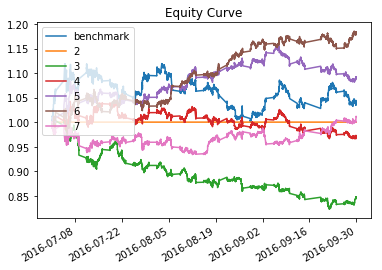

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.197524             -0.002163                -0.009333   
2               0.210643             -0.000347                -0.005390   
3               0.216738              0.001216                -0.004771   
4               0.242205              0.002302                -0.003012   
5               0.205670              0.000203                -0.002409   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.004871                 -0.001043             -0.042108   
2                 0.003919                 -0.000084             -0.039667   
3                 0.003455                  0.000240             -0.030718   
4                 0.002664                  0.000218             -0.032829   
5     

In [21]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-7-1',end='2016-9-30', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=2, price='MidPrice', px_th=px_th)
lm_validation.run()

ag_major_2_th1_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ag_major_2_th1_1.1.csv


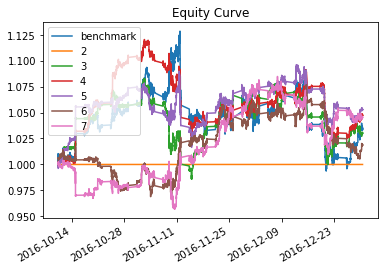

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.181318              0.000451                -0.008118   
2               0.174133              0.000681                -0.004054   
3               0.173072              0.000754                -0.004062   
4               0.179269              0.000289                -0.002559   
5               0.177806              0.000652                -0.002183   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.005808                  0.000274             -0.032989   
2                 0.003832                  0.000197             -0.034134   
3                 0.003231                  0.000156             -0.033307   
4                 0.002443                  0.000035             -0.027748   
5     

In [22]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-10-1',end='2016-12-31', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=2, price='MidPrice', px_th=px_th)
lm_validation.run()

# 2 min freq and price threshold 0

In [23]:
freq=2
px_th = 0
offset = [0.1+i for i in range(freq)]

ag_train, ag_test, ag_probability_table = MajorContracts(symbol='ag', split_time = '2016-7-1', topdir=r'..\\Data',
                                          maturity={'1606':['2015-11-1','2016-5-1'],  
                                                    '1612':['2016-3-1','2016-11-1'],
                                                    '1706':['2016-6-1','2017-1-31']}, 
                                       transitions={'1606':'2016-4-1', 
                                                    '1612':'2016-10-15', 
                                                    '1706':'2017-1-1' },
                                        price='MidPrice',
                                        freq = freq, offset = offset, threshold=px_th).create_major_overlap()

ag1606 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-04-01 00:00:00
probability table:  20160104 20160331
probability table:  20160104 20160331
ag1612 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-3-1', '2016-11-1'] 2016-04-01 00:00:00 2016-10-15 00:00:00
probability table:  20160401.0 20160630.0
probability table:  20160401.0 20160630.0
ag1706 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1706 ['2016-6-1', '2017-1-31'] 2016-10-15 00:00:00 2016-12-31 00:00:00


In [24]:
for offset in ag_test.keys():
    ag_test[offset].to_csv(r'../Output/ag_major_' + str(freq) + '_th' + str(px_th) + '_' + offset + '.csv')
for contract in ['1606', '1612']:
    ag_probability_table[contract].to_csv(r'../Strategy/ag_'+ contract + '_major_strategy_' + str(freq) + '_th' + str(px_th) + '.csv', index=False)

In [25]:
#ag
filepath = "../Strategy"
#fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "ag_*_major_strategy_"+str(freq)+"_th"+str(px_th)+".csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/ag_major_strategy_'+str(freq)+'_th'+str(px_th)+'.csv')
print(slm.head())

ag_1606_major_strategy_2_th0.csv
ag_1612_major_strategy_2_th0.csv
   prior      0      1      2  total signal
0      p  20225  22198  22482  64905      2
1     p0   8317   5903   6003  20223      0
2    p00   4011   2148   2158   8317      0
3   p000   2186    911    914   4011      0
4  p0000   1317    440    429   2186      0


ag_major_2_th0_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ag_major_2_th0_1.1.csv


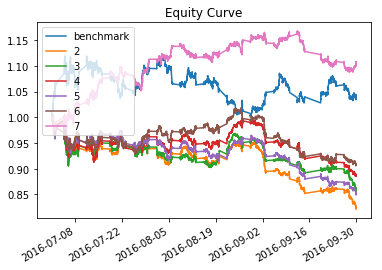

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.218637             -0.002572                -0.000991   
1               0.226042             -0.002020                -0.000970   
2               0.217905             -0.001574                -0.001054   
3               0.219709             -0.002118                -0.001035   
4               0.204872             -0.001233                -0.000985   
5               0.216199              0.001377                -0.000913   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.000571                 -0.000026             -0.030204   
1                 0.000599                 -0.000020             -0.030863   
2                 0.000618                 -0.000018             -0.029326   
3                 0.000627                 -0.000025             -0.031702   
4                 0.000712                 -0.000015             -0.026811   
5     

In [26]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-7-1',end='2016-9-30', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=2, price='MidPrice', px_th=px_th)
lm_validation.run()

ag_major_2_th0_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ag_major_2_th0_1.1.csv


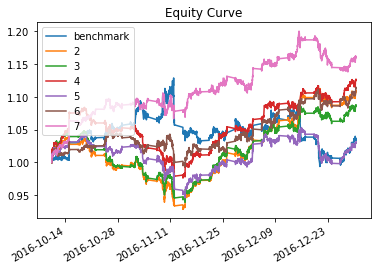

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.175845              0.001483                -0.000793   
1               0.171764              0.001201                -0.000792   
2               0.156749              0.001697                -0.000862   
3               0.179270              0.000450                -0.000869   
4               0.157884              0.001542                -0.000819   
5               0.170268              0.002114                -0.000767   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.000515                  0.000015             -0.020667   
1                 0.000541                  0.000012             -0.019399   
2                 0.000553                  0.000020             -0.014962   
3                 0.000564                  0.000006             -0.023227   
4                 0.000633                  0.000020             -0.023346   
5     

In [27]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-10-1',end='2016-12-31', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=2, price='MidPrice', px_th=px_th)
lm_validation.run()

# 1 min freq and price threshold 1

In [28]:
freq=1
px_th = 1
offset = [0.1+i for i in range(freq)]

ag_train, ag_test, ag_probability_table = MajorContracts(symbol='ag', split_time = '2016-7-1', topdir=r'..\\Data',
                                          maturity={'1606':['2015-11-1','2016-5-1'],  
                                                    '1612':['2016-3-1','2016-11-1'],
                                                    '1706':['2016-6-1','2017-1-31']}, 
                                       transitions={'1606':'2016-4-1', 
                                                    '1612':'2016-10-15', 
                                                    '1706':'2017-1-1' },
                                        price='MidPrice',
                                        freq = freq, offset = offset, threshold=px_th).create_major_overlap()

ag1606 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-04-01 00:00:00
probability table:  20160104 20160331
ag1612 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-3-1', '2016-11-1'] 2016-04-01 00:00:00 2016-10-15 00:00:00
probability table:  20160401.0 20160630.0
ag1706 ..\\Data/ag
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1706 ['2016-6-1', '2017-1-31'] 2016-10-15 00:00:00 2016-12-31 00:00:00


In [29]:
for offset in ag_test.keys():
    ag_test[offset].to_csv(r'../Output/ag_major_' + str(freq) + '_th' + str(px_th) + '_' + offset + '.csv')
for contract in ['1606', '1612']:
    ag_probability_table[contract].to_csv(r'../Strategy/ag_'+ contract + '_major_strategy_' + str(freq) + '_th' + str(px_th) + '.csv', index=False)

In [30]:
#ag
filepath = "../Strategy"
#fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "ag_*_major_strategy_"+str(freq)+"_th"+str(px_th)+".csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/ag_major_strategy_'+str(freq)+'_th'+str(px_th)+'.csv')
print(slm.head())

ag_1606_major_strategy_1_th1.csv
ag_1612_major_strategy_1_th1.csv
   prior      0     1     2  total signal
0      p  52396  6168  6341  64905      0
1     p0  44958  3714  3722  52394      0
2    p00  39751  2630  2575  44956      0
3   p000  35818  1992  1939  39749      0
4  p0000  32698  1560  1558  35816      0


ag_major_1_th1_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


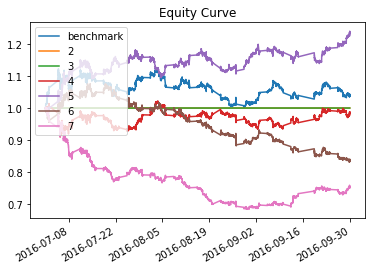

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.000000              0.000000                      NaN   
2               0.194746             -0.000083                -0.006676   
3               0.206597              0.002933                -0.004271   
4               0.203605             -0.002289                -0.003024   
5               0.221480             -0.003705                -0.002221   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                  0.000000              0.000000   
2                 0.005629                 -0.000031             -0.053695   
3                 0.003803                  0.000497             -0.019279   
4                 0.002594                 -0.000220             -0.021755   
5     

In [31]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-7-1',end='2016-9-30', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=1, price='MidPrice', px_th=px_th)
lm_validation.run()

ag_major_1_th1_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


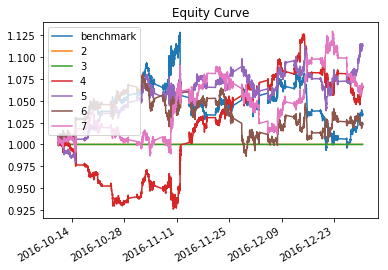

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.000000              0.000000                      NaN   
2               0.197650              0.000965                -0.006025   
3               0.148962              0.001570                -0.003929   
4               0.169798              0.000385                -0.003050   
5               0.174988              0.000966                -0.001958   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                  0.000000              0.000000   
2                 0.004924                  0.000508             -0.033222   
3                 0.003447                  0.000408             -0.028019   
4                 0.002794                  0.000055             -0.030436   
5     

In [32]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-10-1',end='2016-12-31', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=1, price='MidPrice', px_th=px_th)
lm_validation.run()

# 10 min freq and price threshold 0

In [ ]:
freq=10
px_th = 0
offset = [0.1+i for i in range(freq)]

ag_train, ag_test, ag_probability_table = MajorContracts(symbol='ag', split_time = '2016-7-1', topdir=r'..\\Data',
                                          maturity={'1606':['2015-11-1','2016-5-1'],  
                                                    '1612':['2016-3-1','2016-11-1'],
                                                    '1706':['2016-6-1','2017-1-31']}, 
                                       transitions={'1606':'2016-4-1', 
                                                    '1612':'2016-10-15', 
                                                    '1706':'2017-1-1' },
                                        price='MidPrice',
                                        freq = freq, offset = offset, threshold=px_th).create_major_overlap()

In [ ]:
for offset in ag_test.keys():
    ag_test[offset].to_csv(r'../Output/ag_major_' + str(freq) + '_th' + str(px_th) + '_' + offset + '.csv')
for contract in ['1606', '1612']:
    ag_probability_table[contract].to_csv(r'../Strategy/ag_'+ contract + '_major_strategy_' + str(freq) + '_th' + str(px_th) + '.csv', index=False)

In [ ]:
#ag
filepath = "../Strategy"
#fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "ag_*_major_strategy_"+str(freq)+"_th"+str(px_th)+".csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/ag_major_strategy_'+str(freq)+'_th'+str(px_th)+'.csv')
print(slm.head())

In [ ]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-7-1',end='2016-9-30', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=1, price='MidPrice', px_th=px_th)
lm_validation.run()

In [ ]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-10-1',end='2016-12-31', symbol='ag_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=1, price='MidPrice', px_th=px_th)
lm_validation.run()